<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realizacón de esta práctica tendréis que utilizar vuestra propia clase `Graph` implementada en la Práctica 0. Si dicha clase no cumple los requisitos funcionales y no pasa los tests, con muy alta probabilidad los tests propuestos para esta práctica tampoco funcionen correctamente. 
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo los nodos representan las estaciones y los ejes las vias que van de una estación a otra. Todos los ejes tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia


In [23]:
# TODO: Importar grafo de la Práctica0
from util import get_subway_graph, draw_subway_graph
from graph import Graph

G, lines = get_subway_graph('csv', Graph)
G.edge[1][52]
print(G.edge[84])

{148: {'name': 'Bakerloo Line', 'color': 'ab6612', 'stripe': 'NULL', 'line': 1}, 29: {'name': 'Northern Line', 'color': '000000', 'stripe': 'NULL', 'line': 9}, 136: {'name': 'Northern Line', 'color': '000000', 'stripe': 'NULL', 'line': 9}}


Los nodos contienen el nombre de la estación, la latitud y longitud a la que está situada la estación, el número de lineas y la zona.

In [18]:
G.node[124]

{'latitude': 51.5777,
 'longitude': -0.1458,
 'name': 'Highgate',
 'display_name': 'NULL',
 'zone': 3.0,
 'total_lines': 1,
 'rail': '0'}

Para mas consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
 - Klass: la clase Graph que hemos desarrollado en la práctica 0
"""
G, lines = get_subway_graph(location, Klass)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_metro_graph(G, lines, figsize=(10,6), show_labels=False)

```

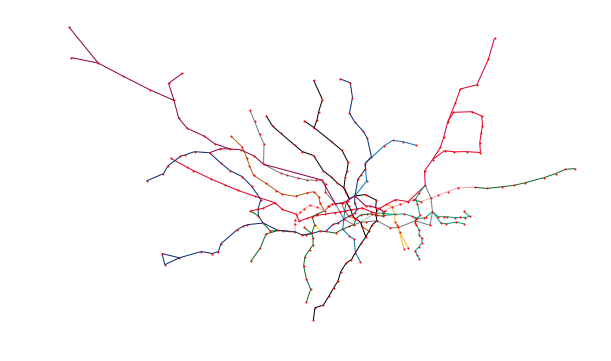

In [25]:
draw_subway_graph(G, lines, figsize=(10,6))

In [21]:
a = {}
a[1] = 2
a[0] = 1
a[-1] = 34
b = set(a)
print(a)
print(b)
print(min(a.keys()))

{1: 2, 0: 1, -1: 34}
{0, 1, -1}
-1


<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  
  <p>
 Se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de linea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de linea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de la función es un diccionario que contiene los siguientes valores:
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [16]:
def dijkstra(G, origen, destino, infinity=float('inf')):
    
    # node_list = G.nodes()
    #
    # node_dict = G.node -----------> {1: {3:}}
    #
    # pQueue -> node_num,dist_acc,way
    # pQueue[]
    #        = [(10,0,[10]),(15,4,[10,15]),...]
    #        = {cost : {node_num : [way]},...} ---------> per accedir a la min fem 'min(pQueue.keys())'
    #    actual[min(pQueue.keys())] = {node_num : [way]}
    #
    # visited -> node_num
    #         = [10,15,...]
    #
    # pQueue[]
    # 
    
    node_list = G.nodes()
    pQueue = {}
    visited = []
    
    actual,actual_cost = origen, 
    
    return {
        'path': [],
        'expanded': 0,
        'distance': 0
    }

In [17]:
dijkstra(G, 10, 235)

{128: {'name': 'Piccadilly Line', 'color': '002d73', 'stripe': 'NULL', 'line': 10}, 95: {'name': 'Piccadilly Line', 'color': '002d73', 'stripe': 'NULL', 'line': 10}}


{'path': [], 'expanded': 0, 'distance': 0}

In [ ]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=float('inf')):
    
    return {
        'path': [],
        'expanded': 0,
        'distance': 0
    }

In [ ]:
dijkstra(G, 10, 235)

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra2</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Matriz de distancias</p></h2>
   <p>
 Se propone el desarrollo de un algoritmo que dado un grafo construya una matriz de $V \times V$ (donde $V$ es el número de vértices del grafo) que contenga la distancia mínima de cada vértice al resto. 
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) sobre el que calcularemos la matriz de distancias. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>El output de la función es un diccionario cuya clave es un nodo (origen) y el valor es otro diccionario con la forma $\{nodo\_destino: distancia\}$.</li>
    </ul>

</p>
</div>


In [ ]:
def dist_mat(G):
    pass

In [ ]:
dist_mat(G)

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Matriz de Distancias</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día __21 de Octubre a las 23:55__. En la tarea que se habilitará en el campus deberéis colgar __el archivo .ipynb__ asi como __el fichero .pyc con vuestra clase grafo__ con los nombres:
</p>
<p>
```
* AA_P1_<apellido1>_<apellido2>_<nombre>.ipynb
* graphs.pyc
```

</p>
<p>
Por ejemplo:
</p>
<p>
```
AA_P1_Doe_Ritchie_John.ipynb
```

</p>
<p>

Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo.
</p>
</div>